# Определение успешности компьютерных игр в интернет-магазине

## Изучение общей информации о данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [4]:
data=pd.read_csv('/datasets/games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Приводим названия столбцов к нижнему регистру

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns=data.columns.str.lower()

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
data['name']=data['name'].str.lower()

In [10]:
data['platform']=data['platform'].str.lower()

In [11]:
data['genre']=data['genre'].str.lower()

In [12]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем тип данных к нужному типу

In [13]:
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Обработала столбец "user_score", для этого заменила абривиатуру tbd на nan, и изменила тип данных на float. если бы оставила эту абривиатуру, то изменить тип данных не получилось бы, а тип "object" не корректен для этих данных.

### Поработаем с пропусками

In [15]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
data=data.dropna(subset=['name'])

In [18]:
data=data.dropna(subset=['year_of_release'])
data['year_of_release']=data['year_of_release'].astype('int')

In [19]:
critic_median=data.groupby('name')['critic_score'].median()
for i in data['name'].unique():
    data.loc[(data['critic_score'].isna())&(data['name']==i), 'critic_score']=critic_median[i]

In [20]:
user_median=data.groupby('name')['user_score'].median() 
for j in data['name'].unique():
    data.loc[(data['user_score'].isna())&(data['name']==j), 'user_score']=user_median[j]

In [21]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
data[data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [24]:
data['rating']=data['rating'].fillna('RP')

In [25]:
data['rating']=data['rating'].replace('K-A', "E")

In [26]:
data['rating']=data['rating'].replace('EC', 'E')

In [27]:
data['rating']=data['rating'].replace('AO', 'M')

In [28]:
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+'], dtype=object)

In [29]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7522
user_score         7920
rating                0
dtype: int64

Пропуски в столбцах name и year_of_release я решила удалить, так как заменить их нечем и их незначительно мало и на исследование эти данные не повлияют. Часть пропусков в оценке пользователей и оценке критиков я заменила на медианное значение, сгруппировав по названию игры(скорей всего рейтинг по определённой игре мало чем будет отличаться от популярной оценки как пользователей так и критиков). Те пропуски, которые остались решила не трогать, скорей всего эти игры оставили без оценки, отсюда и пропуски. В столбце Rating сократила количество категорий, где это возможно, и NAN заменила на RT-рейтинг не определён.

### Суммарные продажи по всем регионам

In [30]:
data['sum_sales']=data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [31]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


In [32]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8922 non-null   float64
 9   user_score       8524 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ

### Сколко игр выпустилось в разные годы

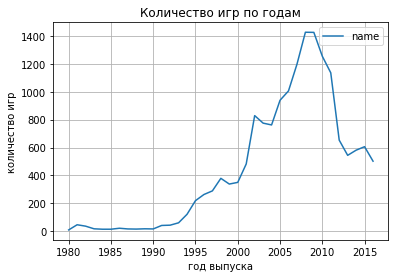

In [33]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, title='Количество игр по годам', xlabel='год выпуска', ylabel='количество игр')
)
plt.show()

Начиная с 90х годов и вплоть до 2008 года наблюдается стабильный рост выпускаемых игр, а начиная с 2008 года выпуск игр стал снижаться. Данные за 1980-1990 не важны, так как в это десятилетие игры выпускались стабильно мало.

### Продажи по платформам

In [34]:
platform_pivot=data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
platform_pivot

,sum_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Судя по сводной таблице платформы с наибольшими продажами PS2 X360 PS3 Wii DS PS. По этим платформам и построим распределение по годам

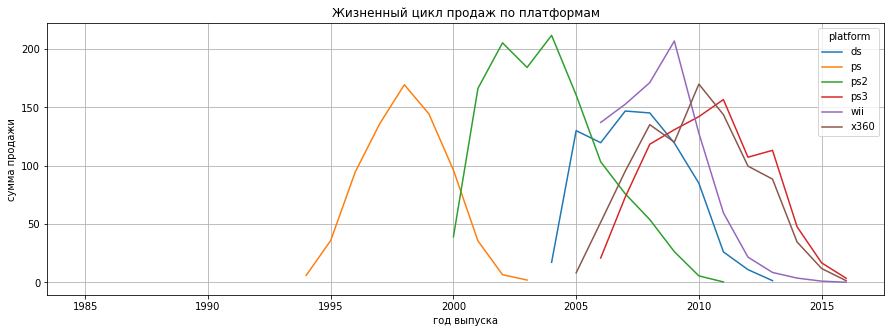

In [35]:
(
   data.query('platform in ["ps2", "x360", "ps3", "wii", "ds", "ps"]').
   pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').
   plot(grid=True, figsize=(15,5), title='Жизненный цикл продаж по платформам', xlabel='год выпуска', ylabel='сумма продажи')
)
plt.show()

Судя по графику срок действия платформы 10 лет

### Исследование по актуальному периоду

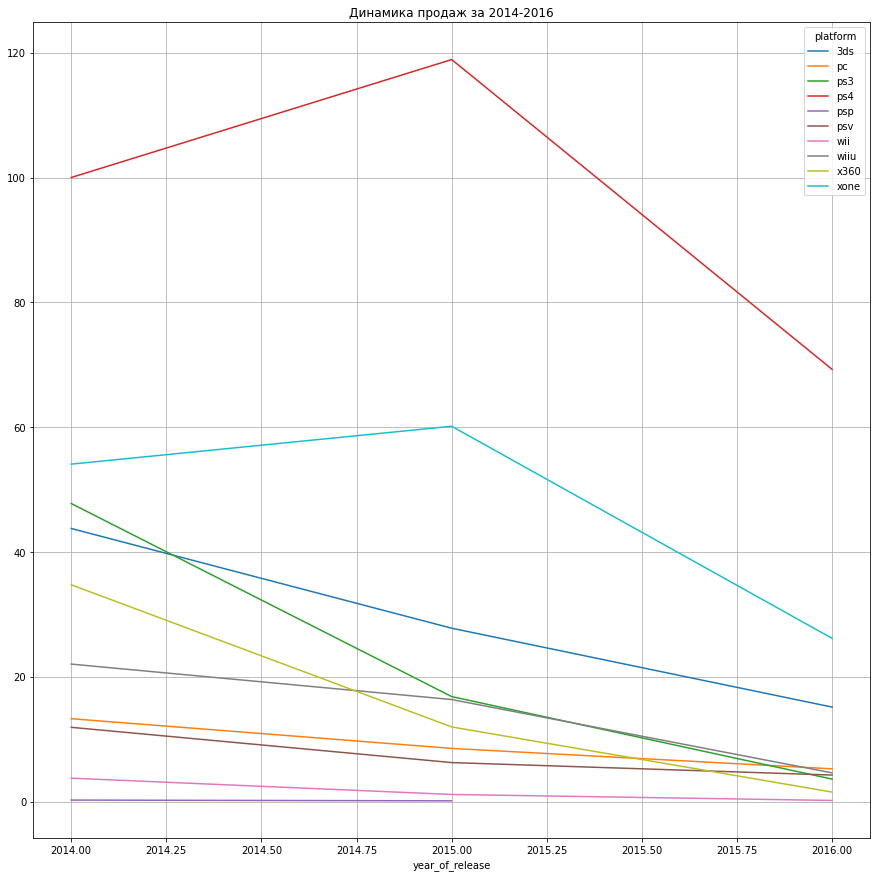

In [36]:
data_new=data.query('year_of_release>=2014')
(
    data_new.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').
    plot(grid=True, figsize=(15,15), title='Динамика продаж за 2014-2016')
)
plt.show()

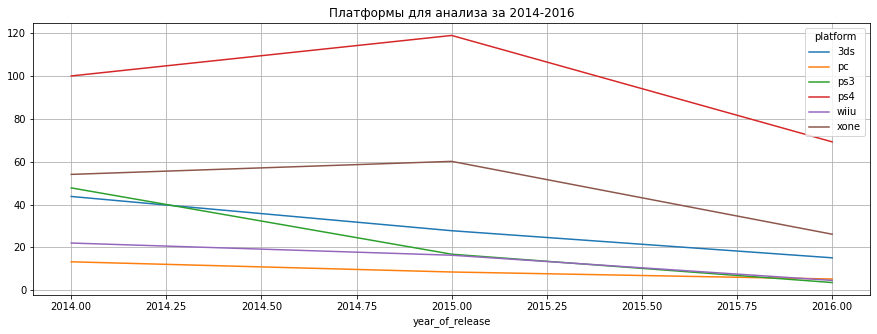

In [37]:
(
    data_new.query('platform ==["ps4","xone","3ds","ps3","wiiu","pc"]').
    pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').
    plot(figsize=(15,5), grid=True, title='Платформы для анализа за 2014-2016')
)
plt.show()

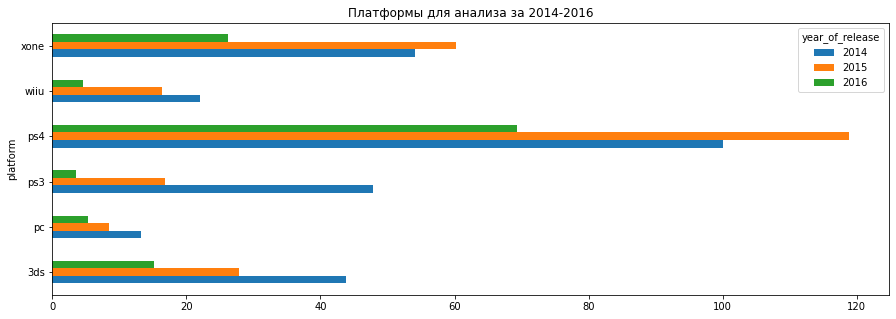

In [38]:
   ( (
    data_new.query('platform ==["ps4","xone","3ds","ps3","wiiu","pc"]').
    pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
    ).
    T.
    plot(kind = 'barh', figsize=(15,5), title=('Платформы для анализа за 2014-2016'))
)
plt.show()

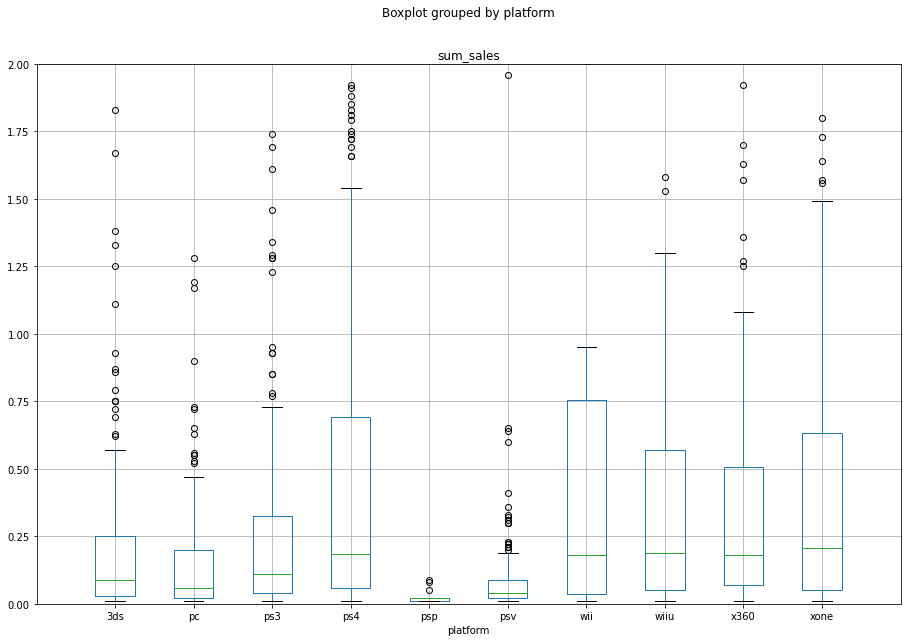

In [40]:
data_new.boxplot(by='platform', column='sum_sales', figsize=(15,10))
plt.xlim(0,11)
plt.ylim(0,2)
plt.show()

Судя по 'ящику с усами' есть большое количество выбросов, их оставлю, так как скорее всего были периоды, когда продажи 'взлетели', думаю для сферы игр это нормально

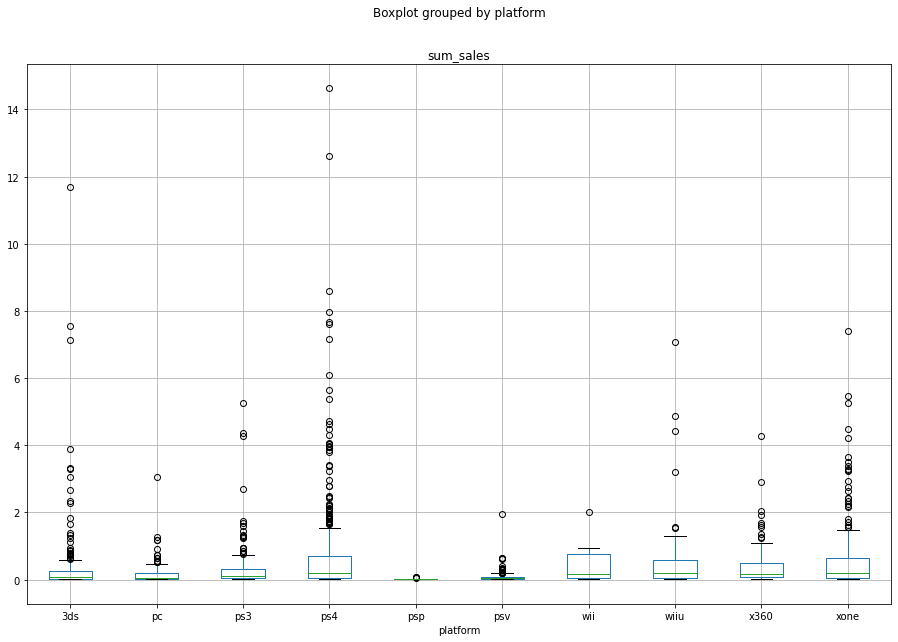

In [41]:
data_new.boxplot(by='platform', column='sum_sales', figsize=(15,10))
plt.show()

За весь период максимальные продажи были у платформы ps4, на втором месте 3ds

### Зависимость продаж от отзывов по платформе PS4 

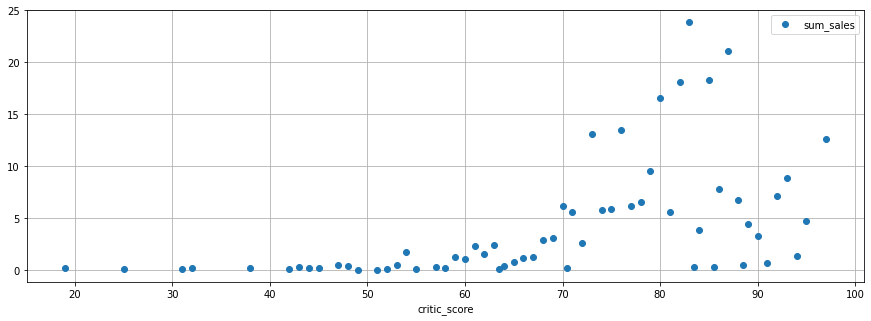

Корреляция продаж от оценки критиков 0.23798643302741437


In [42]:
(
  data.query('platform=="ps4"').
  pivot_table(index='critic_score', values='sum_sales', aggfunc='sum').
  plot(grid=True, figsize=(15,5), style='o')
)
plt.show()
print('Корреляция продаж от оценки критиков', data['sum_sales'].corr(data['critic_score']))

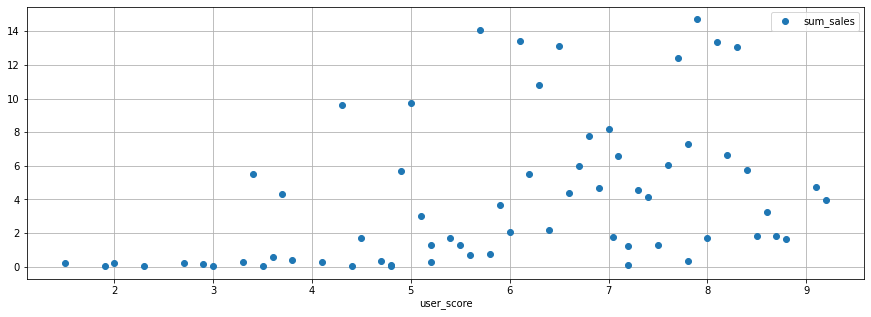

Корреляция продаж от оценки пользователей 0.09197286661764606


In [43]:
(
  data.query('platform=="ps4"').
  pivot_table(index='user_score', values='sum_sales', aggfunc='sum').
  plot(grid=True, figsize=(15,5), style='o')
)
plt.show()
print('Корреляция продаж от оценки пользователей', data['sum_sales'].corr(data['user_score']))

Оценки как критиков так и пользователей не влияют на продажи

Также сравним вывод с другой популярной платформой XOne

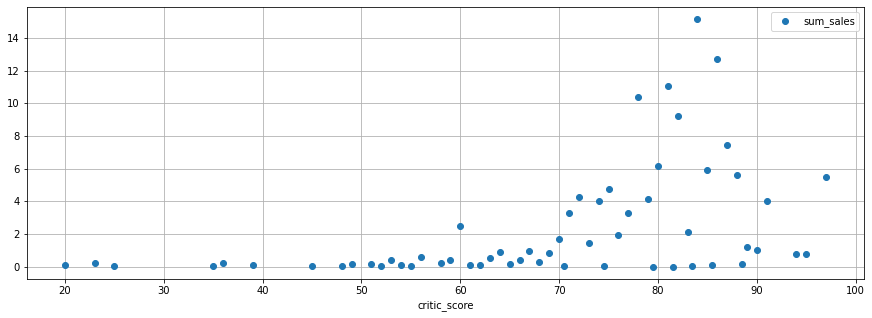

Корреляция продаж от оценки критиков 0.23798643302741437


In [44]:
(
  data.query('platform=="xone"').
  pivot_table(index='critic_score', values='sum_sales', aggfunc='sum').
  plot(grid=True, figsize=(15,5), style='o')
)
plt.show()
print('Корреляция продаж от оценки критиков', data['sum_sales'].corr(data['critic_score']))

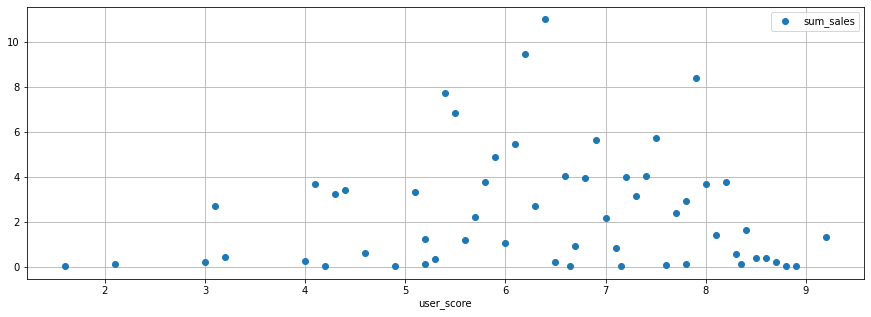

Корреляция продаж от оценки пользователей 0.09197286661764606


In [45]:
(
  data.query('platform=="xone"').
  pivot_table(index='user_score', values='sum_sales', aggfunc='sum').
  plot(grid=True, figsize=(15,5), style='o')
)
plt.show()
print('Корреляция продаж от оценки пользователей', data['sum_sales'].corr(data['user_score']))

### Распределение игр по жанрам

In [46]:
genre_pivot=data.pivot_table(index= 'genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
genre_pivot

,sum_sales
genre,
action,1716.52
sports,1309.67
shooter,1041.36
role-playing,931.08
platform,825.55
misc,790.29
racing,723.49
fighting,442.66
simulation,387.96


Самыми прибыльнымия являются игры жанра Action, на последнем месте Strategy

count      16444
unique        12
top       action
freq        3307
Name: genre, dtype: object

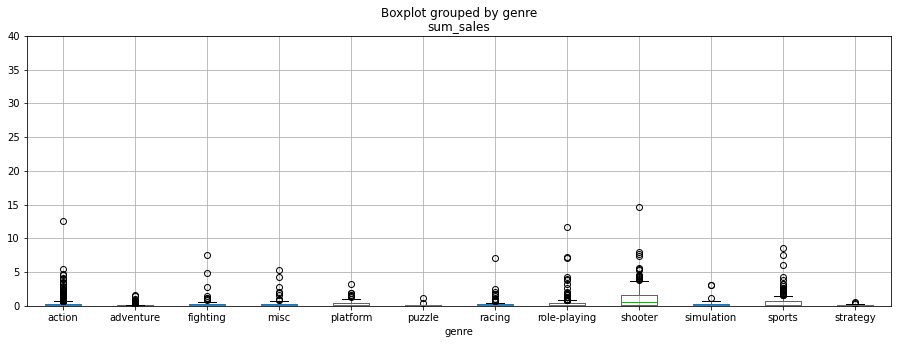

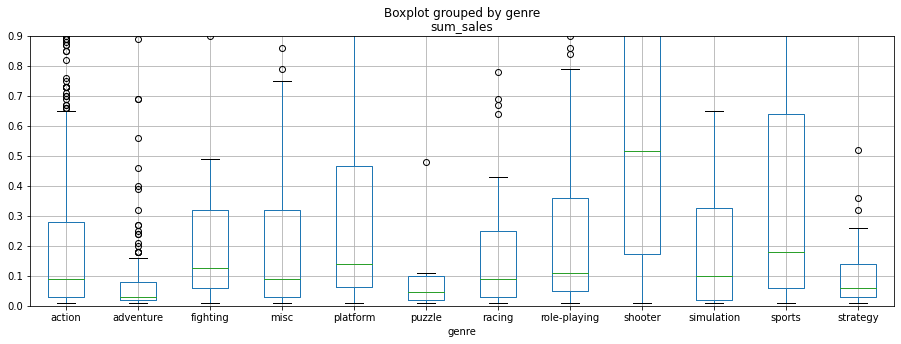

In [47]:
data_new.boxplot(by='genre', column='sum_sales', figsize=(15,5))
plt.ylim(0,40)
data_new.boxplot(by='genre', column='sum_sales', figsize=(15,5))
plt.ylim(0, 0.9)
data['genre'].describe()

ВЫВОД:Начиная с 90х годов и вплоть до 2008 года наблюдается стабильный рост выпускаемых игр, а начиная с 2008 года выпуск игр стал снижаться. За все время наиболее высокие продажи наблюдались по платформам ps4","xone","3ds","ps3","wiiu","pc. Для более точных прогнозов взяла ограниченный период с 2014 г. по 2016 г., за последние 2 года самые большие продажи принесли платформы ps4 и xone. Наблюдается также вспышки продаж практически по всем платформам(об этом говорит большое количество выбросов). Также проанализировала влияние оценок пользователей и критиков на продажи, в результате корреляция слабо положительная, это говорит о том что оценки практически не влияют на продажи. Что касается жанров, то за все время наибольшей популярностью пользовался жанр Action, а вот за последние 2 года-стабильные средние продажи у жанров shooter, platform и sports.

## Портрет пользователя каждого региона

### Самые популярные платформы

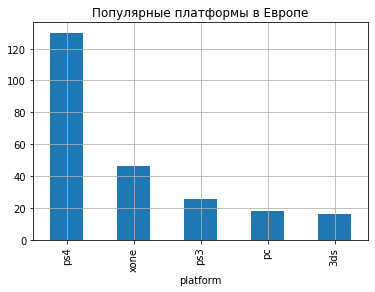

In [48]:
top_eu=data_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_eu.plot(grid=True, kind='bar', title='Популярные платформы в Европе')
plt.show()

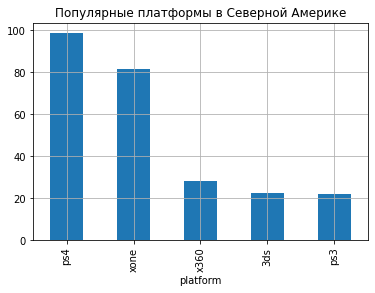

In [49]:
top_na=data_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_na.plot(grid=True, kind='bar', title='Популярные платформы в Северной Америке')
plt.show()

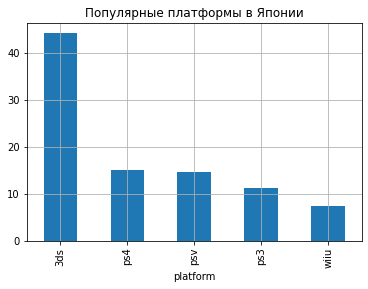

In [50]:
top_jp=data_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
top_jp.plot(grid=True, kind='bar', title='Популярные платформы в Японии')
plt.show()

Самые большие продажи в Северной Америке, на 2ом месте Европа, меньше всего интересуются играми в Японии

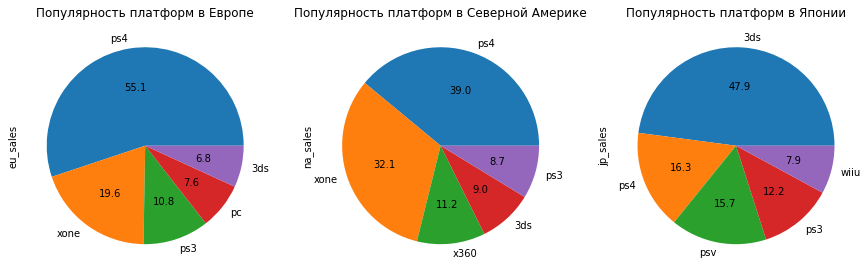

In [51]:
plt.subplot(1,3,1)
top_eu.plot(kind='pie', title='Популярность платформ в Европе', figsize= (15,5), autopct='%.1f')
plt.subplot(1,3,2)
top_na.plot(kind='pie', title='Популярность платформ в Северной Америке', autopct='%.1f')
plt.subplot(1,3,3)
top_jp.plot(kind='pie', title='Популярность платформ в Японии', autopct='%.1f')
plt.show()

### Самые популярные жанры

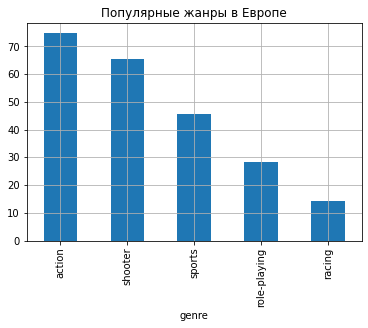

In [52]:
top_eu_genre=data_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
top_eu_genre.plot(grid=True, kind='bar', title='Популярные жанры в Европе')
plt.show()

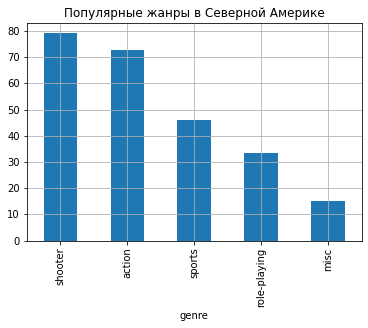

In [53]:
top_na_genre=data_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
top_na_genre.plot(grid=True, kind='bar', title='Популярные жанры в Северной Америке')
plt.show()

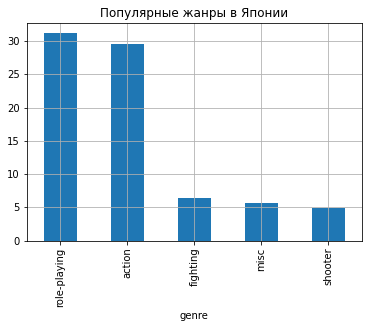

In [54]:
top_jp_genre=data_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
top_jp_genre.plot(grid=True, kind='bar', title='Популярные жанры в Японии')
plt.show()

Самым популярным жанром в Америке и Европе является Action, а вот в Японии-'Role-Playing' (Action только на втором месте, и почти в 2 раза продаж меньше)

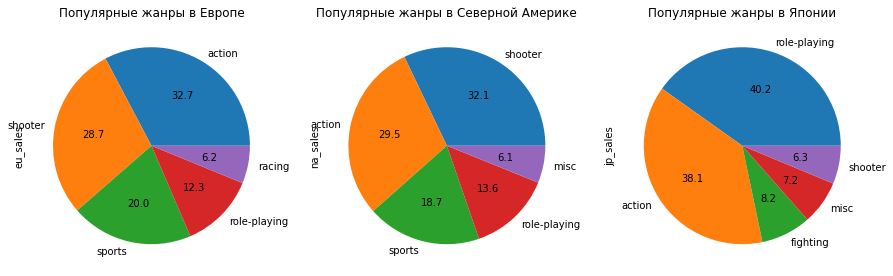

In [55]:
plt.subplot(1,3,1)
top_eu_genre.plot(kind='pie', title='Популярные жанры в Европе',figsize= (15,5), autopct='%.1f')
plt.subplot(1,3,2)
top_na_genre.plot(kind='pie', title='Популярные жанры в Северной Америке', autopct='%.1f')
plt.subplot(1,3,3)
top_jp_genre.plot(kind='pie', title='Популярные жанры в Японии', autopct='%.1f')
plt.show()

### Влияет ли рейтинг на продажи в отдельном регионе

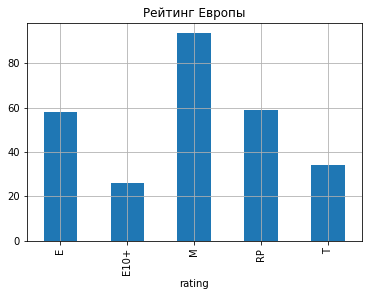

In [57]:
eu_rating=data_new.groupby('rating')['eu_sales'].sum()
eu_rating.plot(grid=True, kind='bar', title='Рейтинг Европы')
plt.show()

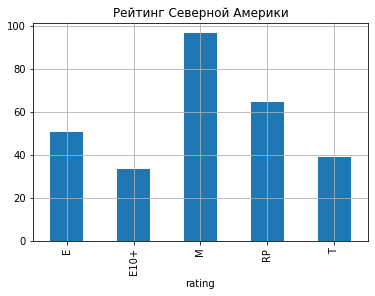

In [58]:
na_rating=data_new.groupby('rating')['na_sales'].sum()
na_rating.plot(grid=True, kind='bar', title='Рейтинг Северной Америки')
plt.show()

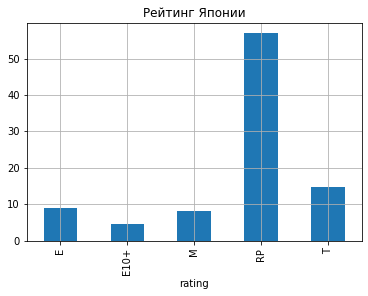

In [59]:
jp_rating=data_new.groupby('rating')['jp_sales'].sum()
jp_rating.plot(grid=True, kind='bar', title='Рейтинг Японии')
plt.show()


1. Портрет пользователя Европы:самые популярные платформы-PS4, XOne, PC, 3DS, PS3, причем более 50% приходится на PS4; европейцы больше всего предпочитают жанр Action, shooter и sports; рейтинг M.

2. Портрет пользователя Северной Америки: самые популярные платформы-PS4, XOne,3DS, WiiU, X360; американцы  больше всего предпочитают жанр shotter, action и sports; рейтинг M.

3. Портрет пользователя Япони: самые популярные платформы- 3DS, PS4, PSV, PS3, WiiU; японцы больше всего предпочитают жанр Role-Playing  и только на втором месте Action; рейтинг RT

## Проверка гипотез

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [60]:
xbox=data_new.loc[(data_new.platform == 'xone')&(data_new.user_score>0)]['user_score']
pc=data_new.loc[(data_new.platform == "pc")&(data_new.user_score>0)]['user_score']
results=st.ttest_ind(
    pc,
    xbox)
alpha=0.05
print(results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.03148460939794486
Отвергаем нулевую гипотезу


In [61]:
action=data_new.loc[(data_new.genre == 'action')&(data_new.user_score>0)]['user_score']
sports=data_new.loc[(data_new.genre == 'sports')&(data_new.user_score>0)]['user_score']
results=st.ttest_ind(action,sports)
alpha=0.05
print(results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


5.851091975884789e-24
Отвергаем нулевую гипотезу


In [62]:
sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


## ВЫВОД

ВЫВОД: Регион продаж является одним из важнейших критериев. Больше всего игр продаётся в Северной Америке, в Японии не так популярны игры. 
    За последние 2 года самыми популярными платформами стали "ps4","xone","3ds","ps3","wiiu","pc". На общем фоне выделились ps4 и хоne для Европы и Северной Америки. В Японии же ps4 (23%)только на втором месте, 44% от общего количества продаж занимает платформа 3ds.
    Также удалось проанализировать популярность жанров в каждом регионе запериод 2014-2016 гг. Для Европы лилидирует жанрдирует жанр Action, чуть меньше продаж в жанре Shooter, и на 3ем месте Sports. Для Северной Америки лидирует Shooter, Action принёс чуть меньше продаж и на 3ем месте также Sports. В Японии картина другая: здесь лидирует жанр Role-playing, Action на втором месте, а вот на третьем жанр Fighting.
    В Европе и Северной Амереке лидируют игры для взрослых(рейтинг М), а вот в Японии лидируют продажи с неопределённым рейтингом.